# Plotting charts with visual identity

The $myGraphics.R$ enables plotting charts preserving visual identity, commonly change the type of chart transparently.  
The majority of functions requires a $data.frame$ with two attributes ($x$, $atr$) or more ($x$, $atr_1$, ..., $atr_n$). 

## Library
The library $myGraphics.R$ has a function named loadlibrary that is responsible for checking installed packages. 
Once the package is installed, it is loaded.

Take some time looking at the parameters of functions available at https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R. They can help set up your graphics. 

In [19]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")

## Color palette

Color brewer is a nice tool to set up color for your graphics. 

In [2]:
col_set <- brewer.pal(11, 'Spectral')
colors <- col_set[c(3,5,7,9)]   

In [3]:
# This function is used only to set graphics size in this notebook. Ignore it for the moment.
plot.size(10, 5)

## Datasets for the examples

This function creates the basic dataset used in the examples.

### flight dataset
It is a synthetic dataset containing the number of flights and delays in an airport every quarter.

In [4]:
create_dataset <- function() {
  data <- read.table(text = "Year Quarters Flights Delays
                     2016 Q1 11 6
                     2016 Q2 12 5
                     2016 Q3 13 3
                     2016 Q4 12 5
                     2017 Q1 10 4
                     2017 Q2 9 3
                     2017 Q3 11 4
                     2017 Q4 25 15
                     2018 Q1 14 3
                     2018 Q2 12 5
                     2018 Q3 13 3
                     2018 Q4 15 4",
                     header = TRUE,sep = "")  
  data$OnTime <- data$Flights - data$Delays 
  data$Perc <- round(100 * data$Delays / data$Flights)
  data$Quarters <- factor(data$Quarters, levels=c("Q1", "Q2", "Q3", "Q4"), ordered = TRUE)
  return(data)
}
flightdata <- create_dataset()
head(flightdata)

,Year,Quarters,Flights,Delays,OnTime,Perc
,<int>,<ord>,<int>,<int>,<int>,<dbl>
1,2016,Q1,11,6,5,55
2,2016,Q2,12,5,7,42
3,2016,Q3,13,3,10,23
4,2016,Q4,12,5,7,42
5,2017,Q1,10,4,6,40
6,2017,Q2,9,3,6,33


### Motor Trend Car Road Tests
The data was extracted from the 1974 Motor Trend US magazine and comprises fuel consumption and ten aspects of automobile design and performance for 32 automobiles (1973–74 models).
It is contained in the datasets package.

In [5]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Scatter plot

This example filters data for flights and delays. It uses two colors and setup $x$ and $y$ labels. 

The function returns a preset graphic that can be enhanced. In this case, we change the $x$ labels orientations and add a centered title.

In [6]:
  series <- mtcars %>% select(wt, mpg, disp)
  head(series)

,wt,mpg,disp
,<dbl>,<dbl>,<dbl>
Mazda RX4,2.620,21.0,160
Mazda RX4 Wag,2.875,21.0,160
Datsun 710,2.320,22.8,108
Hornet 4 Drive,3.215,21.4,258
Hornet Sportabout,3.440,18.7,360
Valiant,3.460,18.1,225


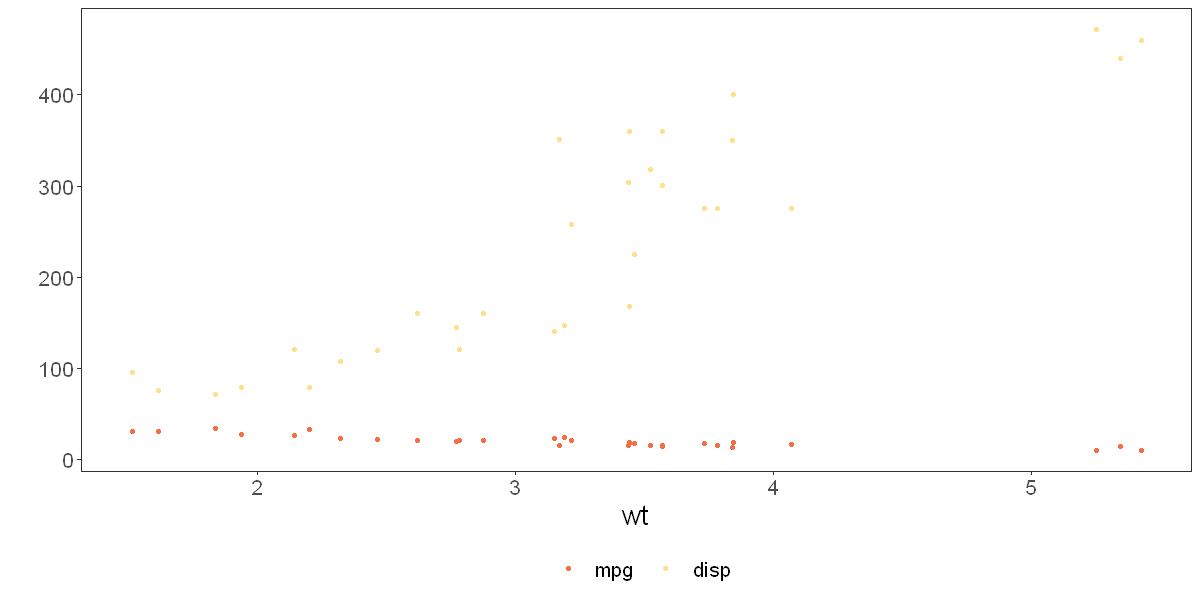

In [7]:
  grf <- plot.scatter(series, label_x = "wt", colors=colors[1:2])
  grf <- grf + theme(text = element_text(size=16))
  plot(grf)

## Line plot
This example filters data for flights and delays. It uses the default configuration and extends the $x$ labels orientation to 45 degrees. 

It is very important to try to associate the same color for a certain data/method. In this case, delays and flights are presented in the same color as in the previous graphic. 

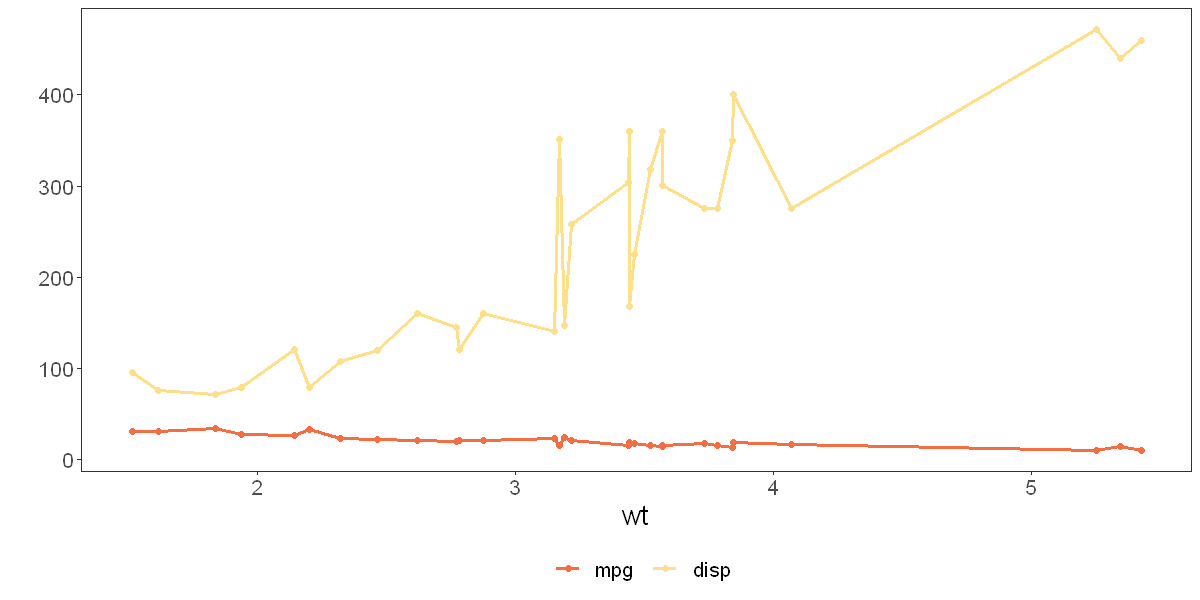

In [8]:
  grf <- plot.series(series, label_x = "wt", colors=colors[1:2])
  grf <- grf + theme(text = element_text(size=16))
  plot(grf)

## Line plot with second y axis

This examples uses mtcars dataset. 

It does a line plot 

It is very important to try to associate the same color for a certain data/method. In this case, delays and flights are presented in the same color as in the previous graphic. 

Loading required package: scales



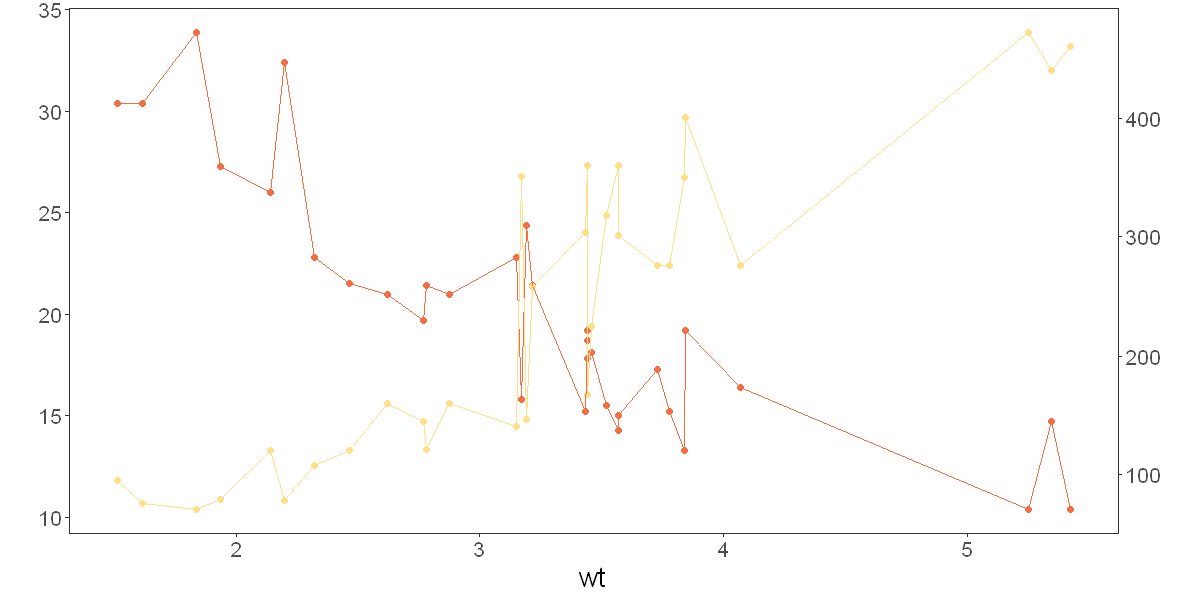

In [9]:
  series <- mtcars %>% select(wt, mpg, disp)
  grf <- plot.series2nd(series, label_x = "wt", colors=colors[1:2])
  grf <- grf + theme(text = element_text(size=16))
  plot(grf)

## Bar graph
This graphic filters data for flights and presents the first 11 quarters. Each quarter is presented in a specific color. 
The function $coord\_flip()$ enables horizontal bar plot.
The function $grid.arrange()$ can put graphics side by side.

In [10]:
series <- mtcars %>% group_by(cyl) %>% summarize(hp = mean(hp))
head(series)

cyl,hp
<dbl>,<dbl>
4,82.63636
6,122.28571
8,209.21429


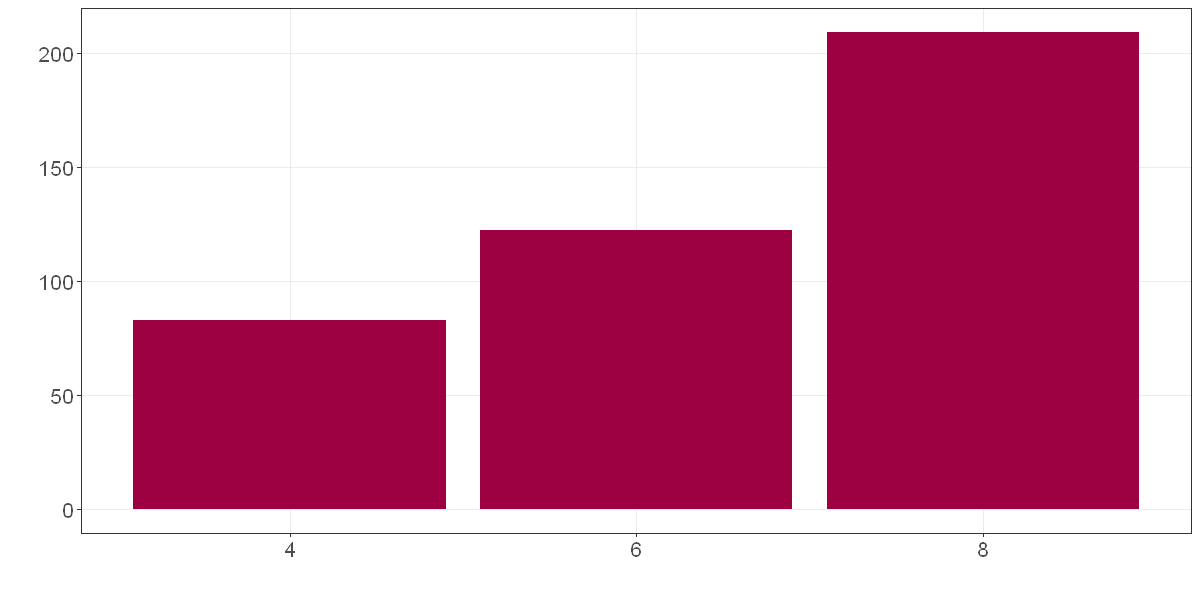

In [11]:
grf <- plot.bar(series, colors=col_set[1])
grf <- grf + theme(text = element_text(size=16))
plot(grf)

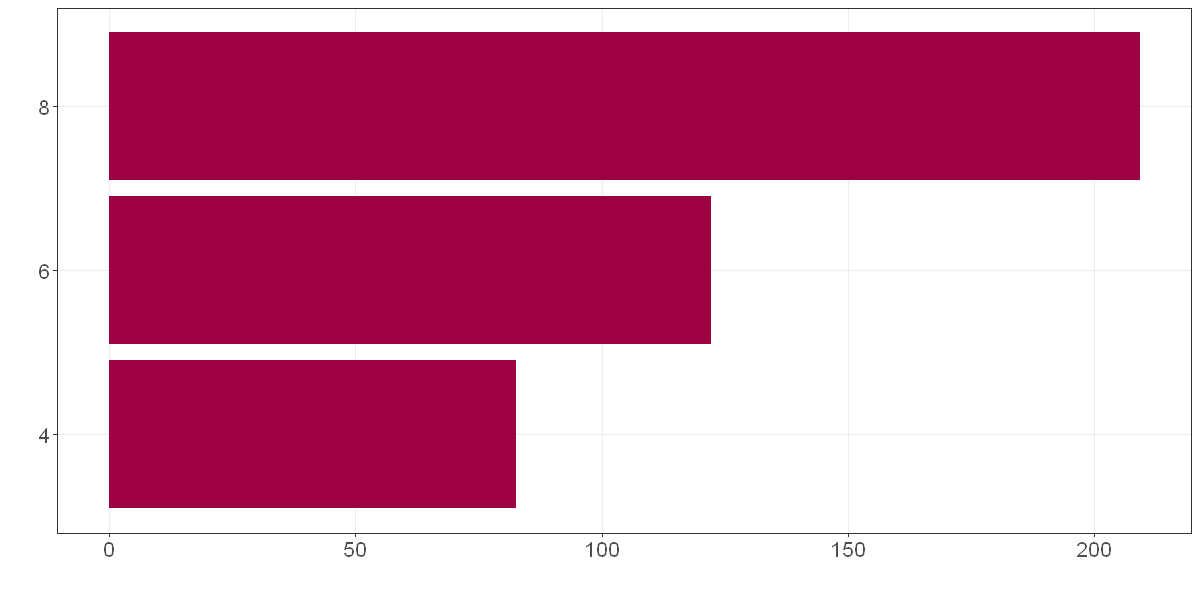

In [12]:
grf <- grf + coord_flip()
plot(grf)

## Bar graph with error bars
This presents the average and the standard deviation of delays per quarters through the years. 
For that, it aggregates mean and sd values according to quarters. 
The conversion of the variable to factor is to sort it according to quarter semantics, instead of alphabetical order. 
The error bar is added using $geom\_errorbar()$ function. 

In [16]:
data_sd <- flightdata %>% 
  select(variable=Quarters, value=Delays) %>% 
  group_by(variable) %>% 
  summarize(mean = mean(value), sd = sd(value))
head(data_sd)

variable,mean,sd
<ord>,<dbl>,<dbl>
Q1,4.333333,1.5275252
Q2,4.333333,1.1547005
Q3,3.333333,0.5773503
Q4,8.000000,6.0827625


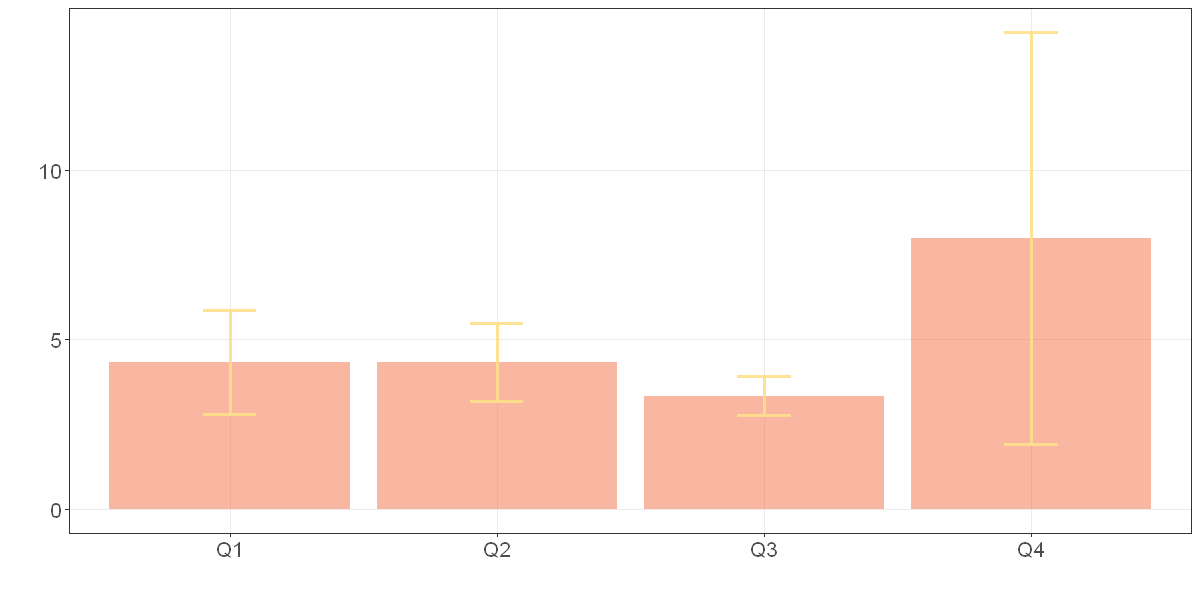

In [18]:
grf <- plot.bar(data_sd, colors=colors[1], alpha=0.5)
grf <- grf + geom_errorbar(aes(x=variable, ymin=mean-sd, ymax=mean+sd), width=0.2, colour=colors[2], alpha=0.9, size=1.1) 
grf <- grf + theme(text = element_text(size=16))
plot(grf)

## Grouped bar & Stacked-bar

Grouped bar or stacked bars can present different perspectives for the same data.


In [20]:
series <- mtcars %>% group_by(cyl) %>% summarize(hp = mean(hp), mpg = mean(mpg))
head(series)

cyl,hp,mpg
<dbl>,<dbl>,<dbl>
4,82.63636,26.66364
6,122.28571,19.74286
8,209.21429,15.10000


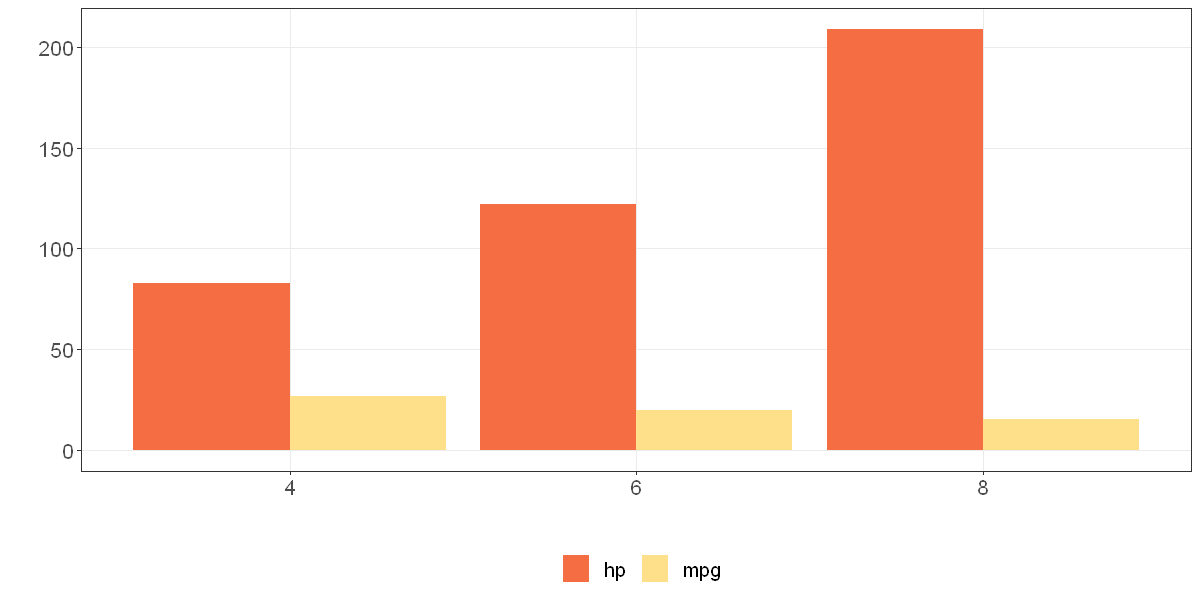

In [23]:
grf <- plot.groupedbar(series, colors=colors[1:2])
grf <- grf + theme(text = element_text(size=16))
plot(grf)

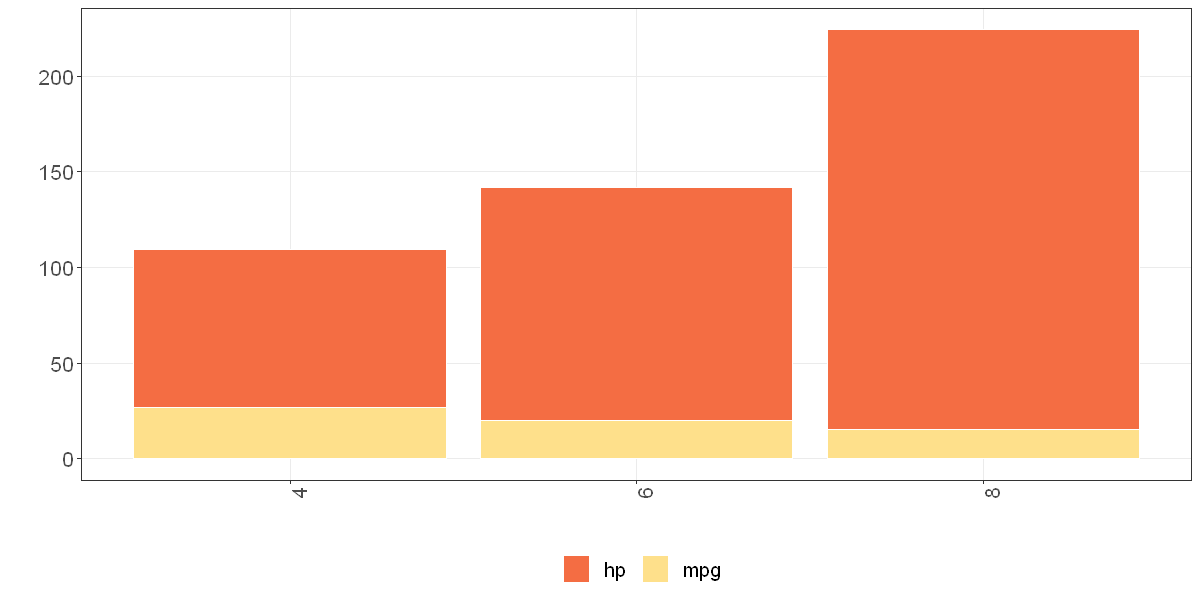

In [24]:
  grf <- plot.stackedbar(series, colors=colors[1:2])
  grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
  grf <- grf + theme(text = element_text(size=16))
  plot(grf)

## Faced grouped bar
This graphic uses a facing column to group data. 
It filters data for on-time and delayed flights. 

In this graphic, labels are set for $x$ and $y$ axis and legend.

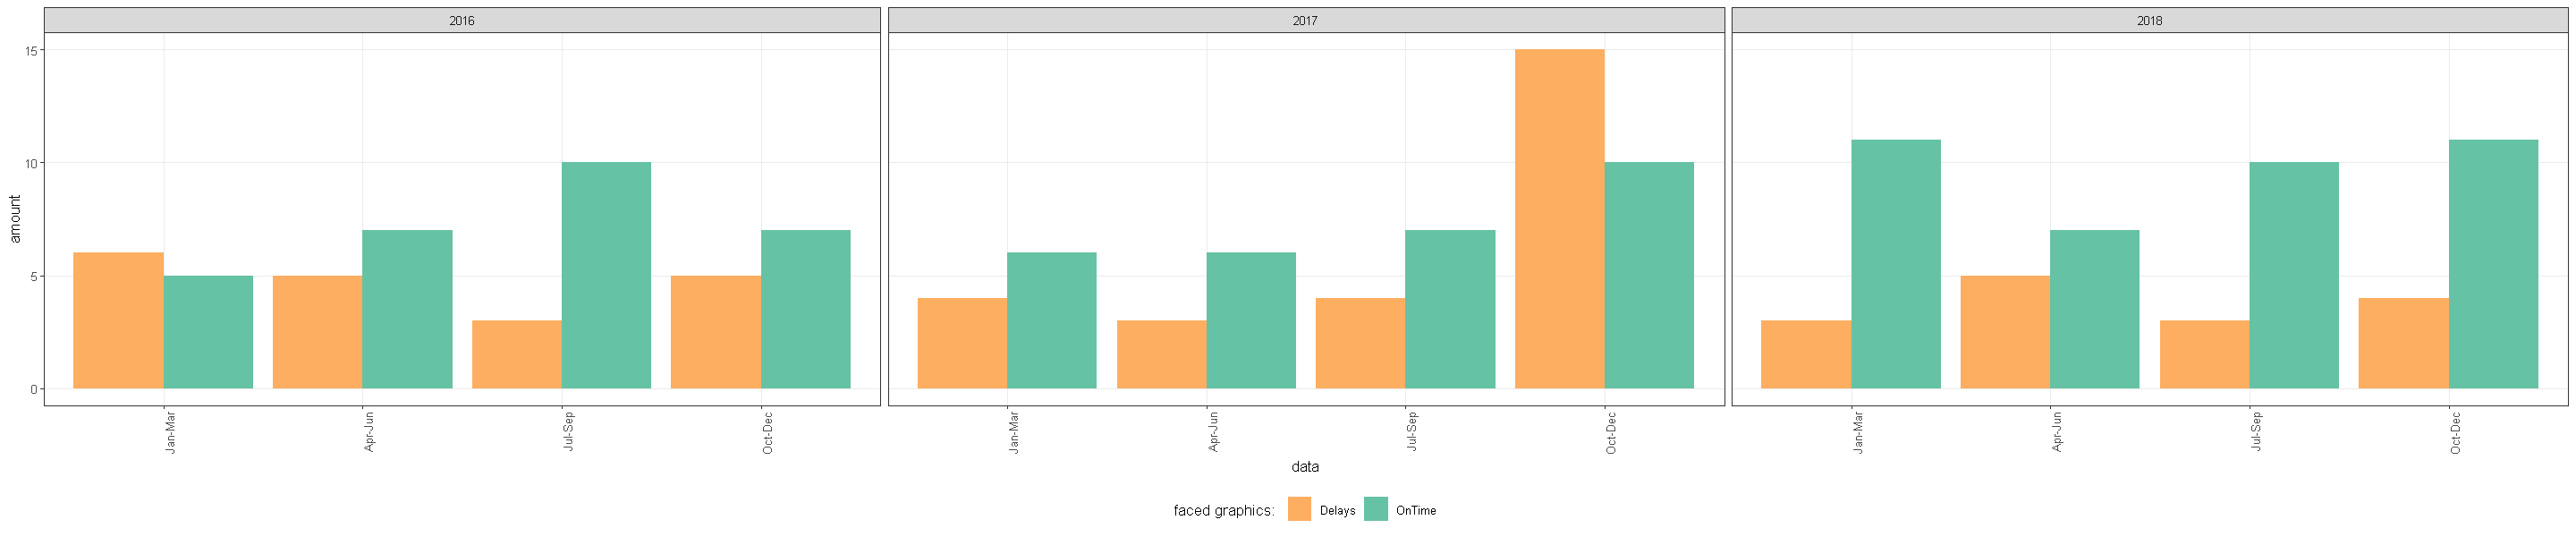

In [42]:
grf <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')) %>% 
                select(x=Months, face=Year, variable=variable, value=value), group=TRUE, colors=col_2)
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + facet_wrap(~face, ncol = 3) 
grf <- grf + xlab("data")
grf <- grf + guides(fill=guide_legend(title="faced graphics:"))
grf <- grf + ylab("amount")

plot_size(24, 5)
plot(grf)
plot_size(12, 5)

## Pie chart
In this graphic data is filtered for the year 2016 and only include flights. 
For each quarter it is associated with a pie-slice with a color. 
The conversion of the variable to factor enables ordering the legend according to the semantics of the data instead of alphabetical sort. 

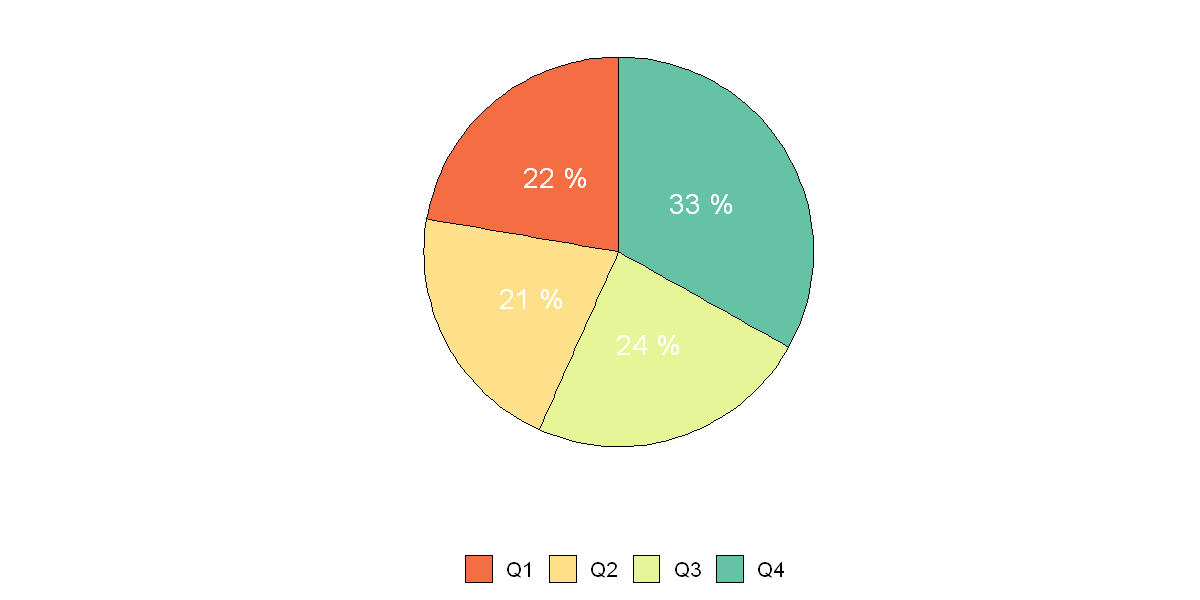

In [26]:
grf <- plot.pieplot(flightdata %>% group_by(Quarters) %>% summarize(Flights=mean(Flights)), colors=col_4)
grf <- grf + theme(text = element_text(size=16))
plot(grf)

## Radar plot
In this graphic data is filtered for the year 2016 and only include delays. 
For each quarter it is associated with an axis. 
The conversion of the variable to factor enables ordering the legend according to the semantics of the data instead of alphabetical sort. 
The $ylim$ function is used to force minimum value to be equal to 0.

cyl,hp
<dbl>,<dbl>
4,82.63636
6,122.28571
8,209.21429


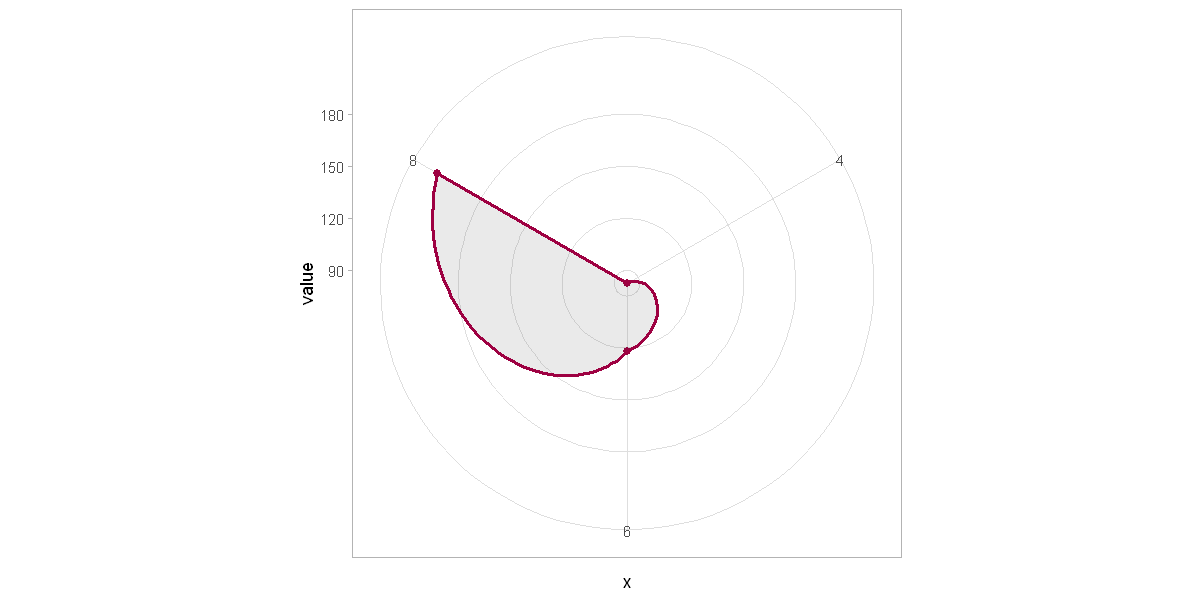

In [35]:
  series <- mtcars %>% group_by(cyl) %>% summarize(hp = mean(hp))
head(series)
  grf <- plot.radar(series, colors=col_set[1])
#grf <- grf + ylim(0, 200)
  plot(grf)


## Lollipop plot

In this graphic, only the percentage of delayed flights is presented. 
This is a nice way to avoid using bar plots or pie charts.

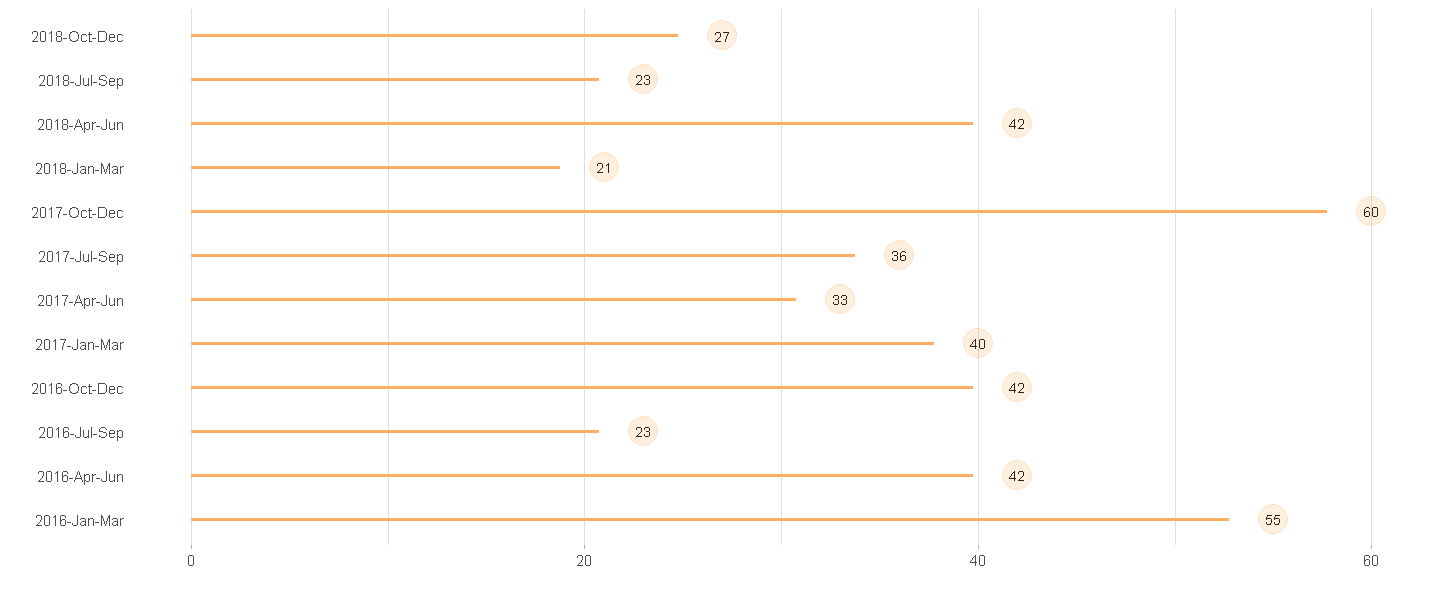

In [45]:
grf <- plot_lollipop(data %>% filter(variable =="Perc") %>% select(variable=x,value=value), col_2[1], max_value_gap=2.25)

plot(grf)

## Dot plot
In this graphic data is filtered for the year 2016 and the goal is to compare the number of delays with respect to on time flights. 

Data is plotted in ascending order of the values of the first variable in the dataset (Delays, displayed in orange). 

It is also important to observe that the function $plot\_dotchar$ internally uses $ggdotchart$, which is not compatible with other $ggplot$ methods. Customizations should be done using $ggpar$ function, such as introducing a legend title. 


,variable,x,value
,<fct>,<fct>,<dbl>
1,Delays,Jan-Mar,6
2,Delays,Apr-Jun,5
3,Delays,Jul-Sep,3
4,Delays,Oct-Dec,5
5,OnTime,Jan-Mar,5
6,OnTime,Apr-Jun,7


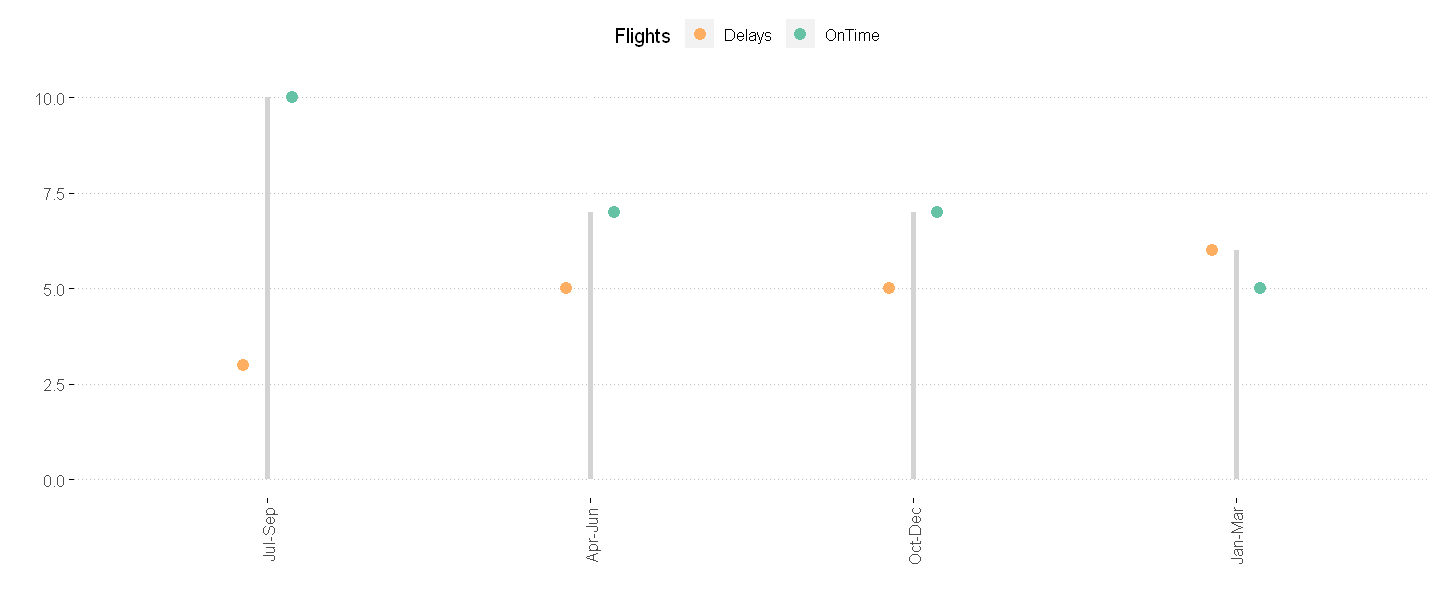

In [46]:
dotdata <- data %>% filter(variable %in% c("Delays", "OnTime") & Year==2016) %>% select(variable = variable, x = Months, value = value)
head(dotdata)

grf <- plot_dotchar(dotdata, color=col_2)
grf <- ggpar(grf,legend.title = 'Flights')

plot(grf)

## Ballon plot
This graph is able to combine two variables pair-wise. The intensity of this combination can be explored both by circle radius and color scale. It can be used to plot the correlation between all pairs of variables in a dataset, for example.

To present the $x$ and $y$ axis according a desired order, data need to be converted into factors. 

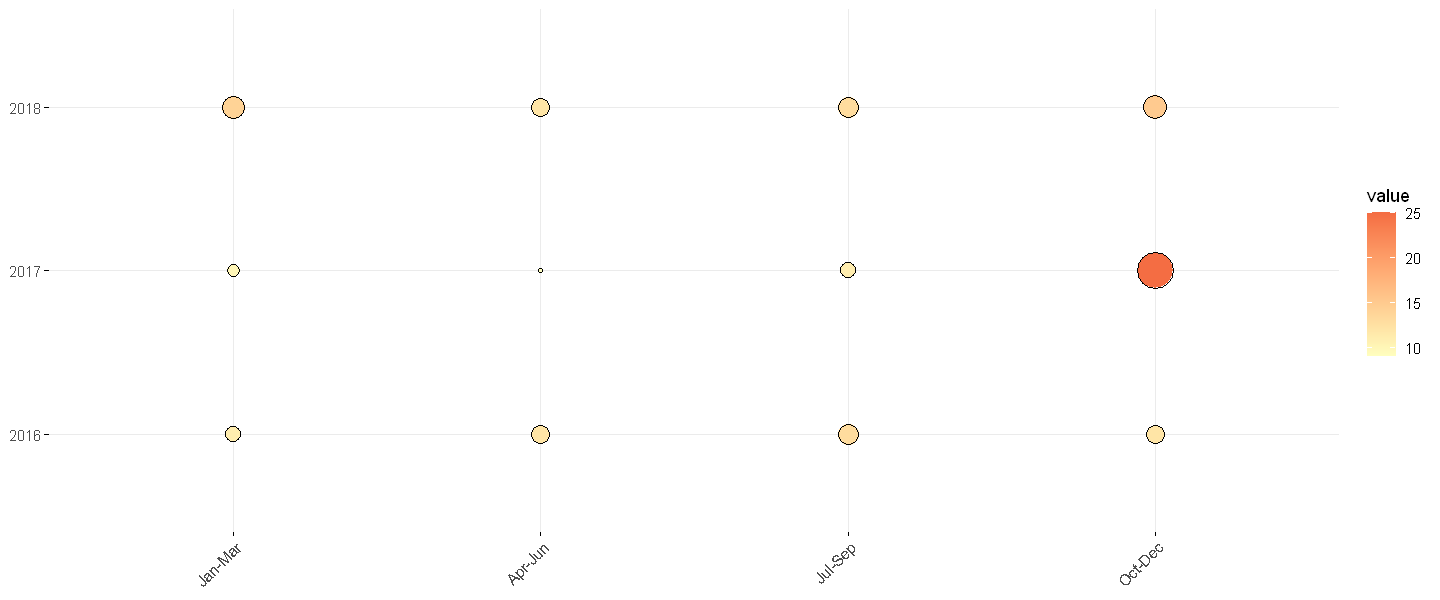

In [47]:
data_ballon <- data %>%  filter(variable == "Flights") %>% select(variable=Year, x=Months, value=value)
data_ballon$variable <- factor(data_ballon$variable,levels = sort(unique(data_ballon$variable)))
data_ballon$x <- factor(data_ballon$x,levels = c('Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'))
data_ballon$radius <- data_ballon$value

grf <- plot_ballon(data_ballon, color = col_set[c(6,3)])

plot(grf)

## Examples using data distribution
The following examples use random variables so that different data distribution can be better viewed.

In [48]:
stdata <- data.frame(exponential = rexp(100000, rate = 1), 
                     uniform = runif(100000, min = 5.5, max = 6.5), 
                     normal = rnorm(100000, mean=5), 
                     poisson = rpois(100000, lambda = 2))
head(stdata)
stdata <- melt(stdata[,c('exponential', 'uniform', 'normal', 'poisson')])
head(stdata)

,exponential,uniform,normal,poisson
,<dbl>,<dbl>,<dbl>,<int>
1,1.40659204,6.484961,3.313828,1
2,0.08266335,5.964915,4.417647,2
3,0.71010592,6.274179,5.440798,3
4,0.56282430,6.076701,3.385869,3
5,2.60758578,6.216331,4.849411,5
6,0.44729568,5.632223,6.768948,1


Using  as id variables



,variable,value
,<fct>,<dbl>
1,exponential,1.40659204
2,exponential,0.08266335
3,exponential,0.71010592
4,exponential,0.56282430
5,exponential,2.60758578
6,exponential,0.44729568


## Histogram
Histograms are used to plot a single variable.

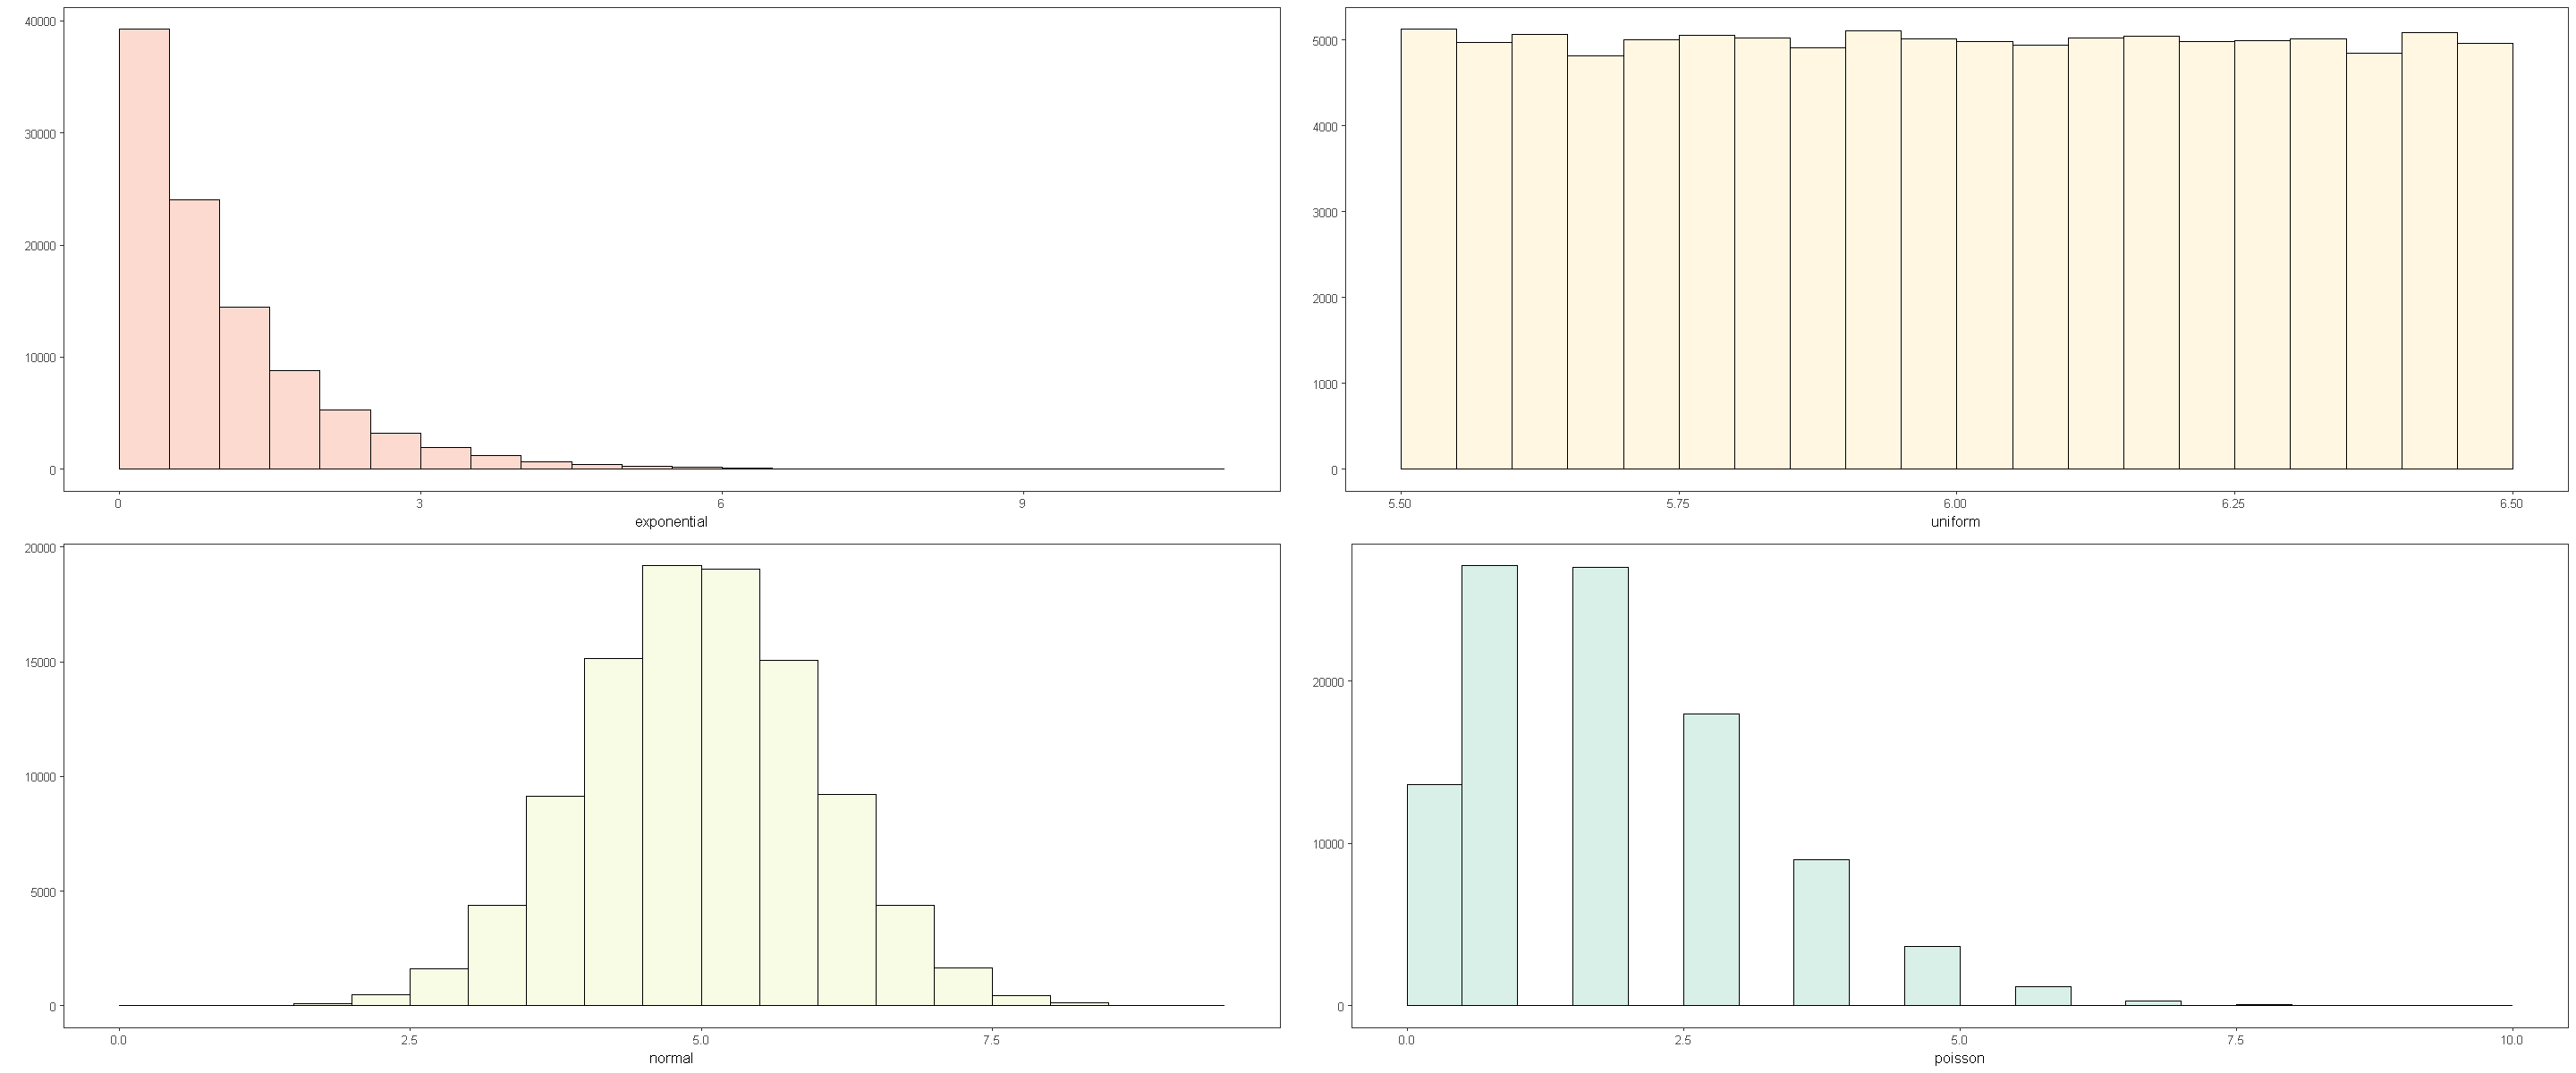

In [51]:
grfe <- plot.hist(stdata %>% filter(variable=='exponential'), label_x = "exponential", color=col_4[1])
grfu <- plot.hist(stdata %>% filter(variable=='uniform'), label_x = "uniform", color=col_4[2])
grfn <- plot.hist(stdata %>% filter(variable=='normal'), label_x = "normal", color=col_4[3])
grfp <- plot.hist(stdata %>% filter(variable=='poisson'), label_x = "poisson", color=col_4[4])

plot_size(24, 10)
grid.arrange(grfe, grfu, grfn, grfp,ncol=2)
plot_size(12, 5)

## Density plot
This graphic presents the on-time and delayed flights density distribution.

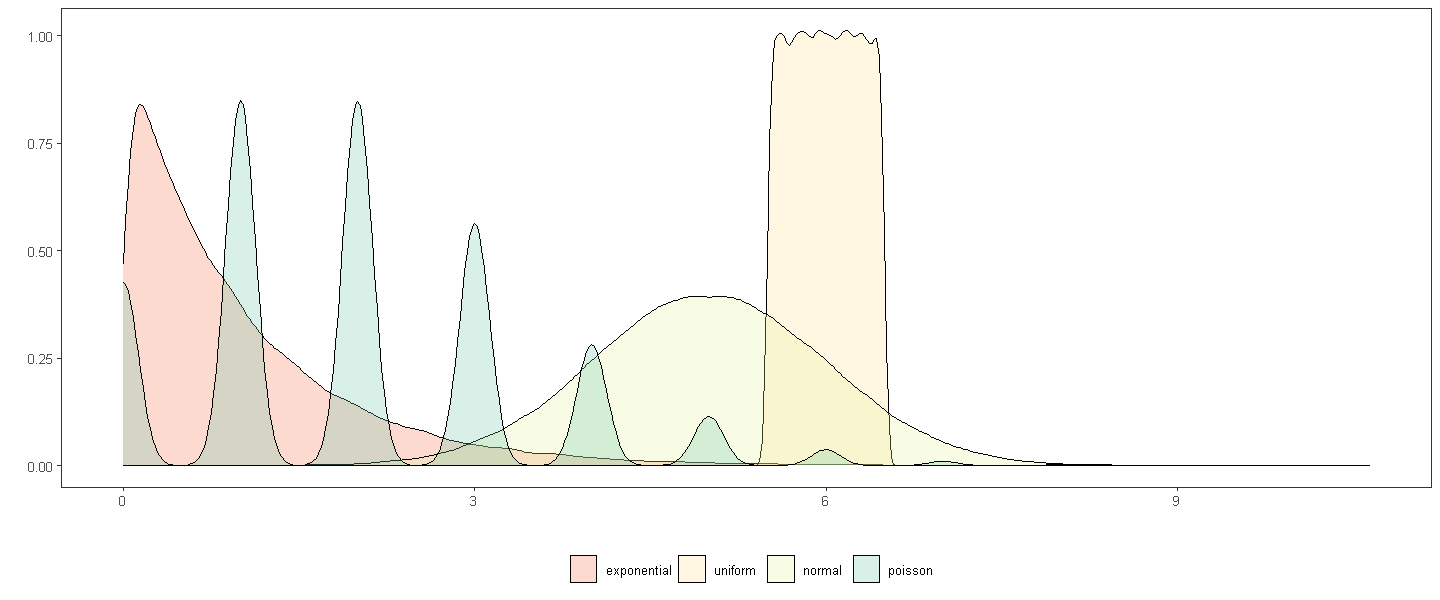

In [52]:
grf <- plot.density(stdata, label_series = "", colors=col_4)

plot(grf)

## Box-plot
This graphic presents the on-time and delayed flights boxplot.

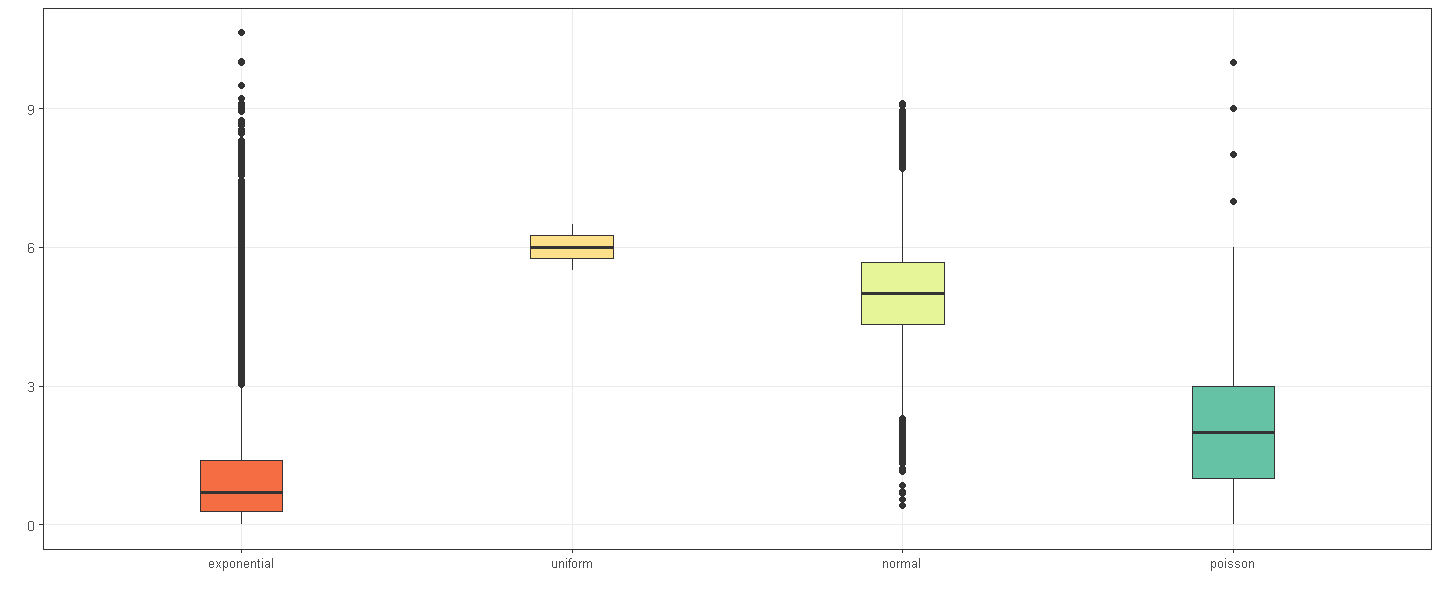

In [53]:
grf <- plot.boxplot(stdata, colors=col_4)
plot(grf)

## Building PDF from graphics

In [54]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grf)
dev.off()

png 
  2